# ***COVID-19 Spread Analysis ***

In [1]:
pip install dash

In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the dataset
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(data_url)

In [3]:


# List of countries to include (50-80 countries)
selected_countries = [
    'United States', 'India', 'Brazil', 'Russia', 'United Kingdom', 'Germany', 'France', 'Italy',
    'Spain', 'Turkey', 'Mexico', 'South Africa', 'Argentina', 'Colombia', 'Indonesia', 'Saudi Arabia',
    'Canada', 'Australia', 'China', 'Japan', 'South Korea', 'Sweden', 'Netherlands', 'Switzerland',
    'Belgium', 'Norway', 'Denmark', 'Austria', 'Poland', 'Portugal', 'Czech Republic', 'Hungary',
    'Greece', 'Finland', 'Ireland', 'Israel', 'Thailand', 'Malaysia', 'Vietnam', 'Singapore', 'Pakistan',
    'Bangladesh', 'Ukraine', 'Egypt', 'Nigeria', 'Kenya', 'Chile', 'Peru', 'Philippines', 'New Zealand'
]

# Filter for these countries and necessary columns
filtered_data = df[df['location'].isin(selected_countries)][[
    'location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations',
    'population', 'life_expectancy', 'hospital_beds_per_thousand', 'iso_code'
]]

# Drop rows with missing critical information
filtered_data = filtered_data.dropna()

# Ensure dates are in ascending order and then keep the last 5 entries per country
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data = filtered_data.sort_values(['location', 'date'], ascending=[True, True])

# Keep only the last 5 rows per country
last_5_rows_per_country = filtered_data.groupby('location').tail(5)


In [4]:
import plotly.express as px

# Plot total cases by country
fig_cases = px.line(filtered_data, x='date', y='total_cases', color='location', title='Total COVID-19 Cases by Country')
fig_cases.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


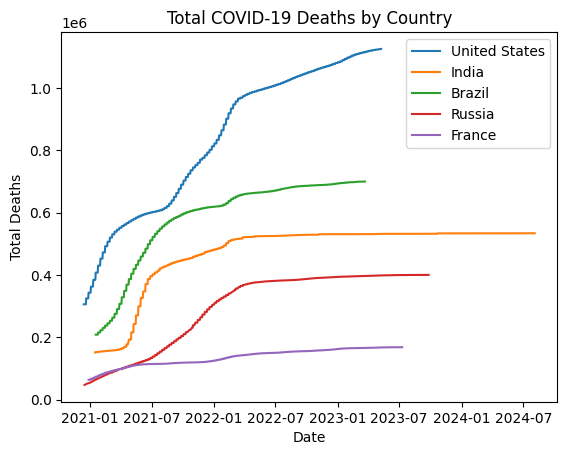

In [5]:
import matplotlib.pyplot as plt

countries = ['United States', 'India', 'Brazil', 'Russia', 'France']

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths by Country")
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()


In [6]:
# Plot total vaccinations by country
fig_vaccinations = px.line(filtered_data, x='date', y='total_vaccinations', color='location', title='Total COVID-19 Vaccinations by Country')
fig_vaccinations.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [7]:

# Initialize Dash app
app = dash.Dash(__name__)

# Custom styles for the UI (same as before)
style_stat_box = {
    'background-color': '#333333',
    'color': '#ffffff',
    'padding': '15px',
    'border-radius': '10px',
    'width': '18%',
    'text-align': 'center',
    'box-shadow': '0px 0px 15px 2px rgba(0, 204, 255, 0.5)',
}

style_container = {
    'display': 'flex',
    'justify-content': 'space-between',
    'margin-top': '10px',
}

map_container = {
    'background-color': '#1a1a1a',
    'padding': '20px',
    'box-shadow': '0px 0px 20px 4px rgba(0, 204, 255, 0.5)',
}


In [8]:

app.layout = html.Div(
    style={'backgroundColor': '#1a1a1a', 'padding': '20px', 'font-family': 'Arial'},
    children=[
        html.H1("COVID-19 Global Dashboard", style={'text-align': 'center', 'color': '#00ccff'}),

        # Dropdown for country selection
        dcc.Dropdown(
            id='country_dropdown',
            options=[{'label': country, 'value': country} for country in selected_countries],
            value='United States',
            multi=False,
            style={'width': '40%', 'margin': 'auto', 'color': 'black'}
        ),

        # World map with COVID data overlay
        html.Div([
            dcc.Graph(id='world_map', style={'height': '80vh', 'margin-top': '20px'})
        ], style=map_container),

        # Stats section
        html.Div([
            html.Div([
                html.H2("Total Cases", style={'color': '#ffffff'}),
                html.P(id='total_cases', style={'color': '#00ccff', 'font-size': '20px'}),
            ], style=style_stat_box),

            html.Div([
                html.H2("Total Vaccinations", style={'color': '#66ff66'}),
                html.P(id='total_vaccinations', style={'color': '#66ff66', 'font-size': '20px'}),
            ], style=style_stat_box),

            html.Div([
                html.H2("Total Deaths", style={'color': '#ff6666'}),
                html.P(id='total_deaths', style={'color': '#ff6666', 'font-size': '20px'}),
            ], style=style_stat_box),
        ], style=style_container),

        # Additional stats section
        html.Div([
            html.Div([
                html.H2("Vaccinated Percentage", style={'color': '#ffffff'}),
                html.P(id='vaccinated_percentage', style={'color': '#66ff66', 'font-size': '20px'}),
            ], style=style_stat_box),

            html.Div([
                html.H2("Population", style={'color': '#00ccff'}),
                html.P(id='population', style={'color': '#00ccff', 'font-size': '20px'}),
            ], style=style_stat_box),

            html.Div([
                html.H2("Life Expectancy", style={'color': '#00ccff'}),
                html.P(id='life_expectancy', style={'color': '#00ccff', 'font-size': '20px'}),
            ], style=style_stat_box),
        ], style=style_container),

        # Hospital beds and other metrics
        html.Div([
            html.Div([
                html.H2("Hospital Beds per Thousand", style={'color': '#ffffff'}),
                html.P(id='hospital_beds_per_thousand', style={'color': '#00ccff', 'font-size': '20px'}),
            ], style=style_stat_box),
        ], style={'display': 'flex', 'justify-content': 'center', 'margin-top': '20px'}),

        # Line graph for case trends (Now with the last 5 rows)
        dcc.Graph(id='cases_trend_graph', style={'height': '60vh', 'margin-top': '30px'}),

        # Signature
        html.Footer('Created by AI Innovators', style={'text-align': 'center', 'font-size': '24px', 'color': '#00ccff', 'margin-top': '40px'})
    ]
)


In [9]:
@app.callback(
    [Output('total_cases', 'children'),
     Output('total_vaccinations', 'children'),
     Output('total_deaths', 'children'),
     Output('vaccinated_percentage', 'children'),
     Output('population', 'children'),
     Output('life_expectancy', 'children'),
     Output('hospital_beds_per_thousand', 'children'),
     Output('cases_trend_graph', 'figure'),
     Output('world_map', 'figure')],
    [Input('country_dropdown', 'value')]
)
def update_dashboard(selected_country):
    # Filter data for the selected country (last 5 rows)
    country_data = last_5_rows_per_country[last_5_rows_per_country['location'] == selected_country]

    # Get the most recent row for basic stats
    latest_data_country = country_data.iloc[-1]

    # Calculate stats for the selected country
    total_cases = latest_data_country['total_cases']
    total_vaccinations = latest_data_country['total_vaccinations']
    total_deaths = latest_data_country['total_deaths']
    population = latest_data_country['population']
    life_expectancy = latest_data_country['life_expectancy']
    hospital_beds_per_thousand = latest_data_country['hospital_beds_per_thousand']
    vaccinated_percentage = (total_vaccinations / population) * 100 if population > 0 else 0

    # Line chart for the last 5 rows (case trends)
    line_chart = px.line(
        country_data, x='date', y='total_cases',
        title=f'Total Cases Trend in {selected_country} (Last 5 Days)',
        labels={'x': 'Date', 'y': 'Total Cases'},
        template='plotly_dark'
    )
    line_chart.update_layout(
        plot_bgcolor='#1a1a1a',
        paper_bgcolor='#1a1a1a',
        font_color='white'
    )


    # World map for COVID data overlay
    world_map = px.choropleth(
        last_5_rows_per_country,
        locations='iso_code',
        color='total_cases',
        hover_name='location',
        color_continuous_scale='OrRd',
        title="Global COVID-19 Cases",
        template='plotly_dark'
    )
    world_map.update_layout(
        plot_bgcolor='#1a1a1a',
        paper_bgcolor='#1a1a1a',
        font_color='white'
    )

    return (f'{total_cases:,.0f}',
            f'{total_vaccinations:,.0f}',
            f'{total_deaths:,.0f}',
            f'{vaccinated_percentage:.2f}%',
            f'{population:,.0f}',
            f'{life_expectancy:.1f}',
            f'{hospital_beds_per_thousand:.1f}',
            line_chart,
            world_map)
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# **HAPPY COADING**